# Tutorial

Import basic packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Cubic Spline (1D)

The class `CubicSpline` provides a method for interpolating data sampled on a uniform one-dimensional grid.

In [2]:
from multispline.spline import CubicSpline

As a first example we interpolate an oscillatory function, sampled at 100 equidistant points, using `CubicSpline`

In [3]:
def test_function(x):
    return np.sin(x) + 0.1 * np.cos(10*x)

sample_points = np.linspace(0, 5, 100)
sample_values = test_function(sample_points)

Constructing an interpolating cubic spline is then as simple as initializing the `CubicSpline` class

In [4]:
cspl = CubicSpline(sample_points, sample_values)

We can evaluate the spline to visually check how well the spline approximates our test function

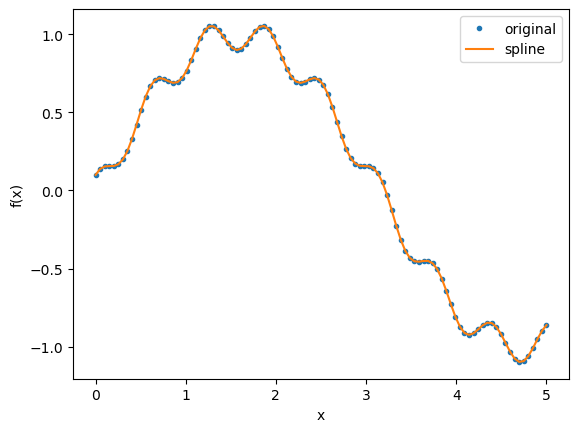

In [5]:
plt.plot(sample_points, sample_values, '.', label='original')
plt.plot(sample_points, cspl(sample_points), label='spline')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

To test the accuracy of the spline, we can also evaluate it at values that differ from the sample values

In [6]:
test_points = np.linspace(0, 5, 66)
test_values = test_function(test_points)

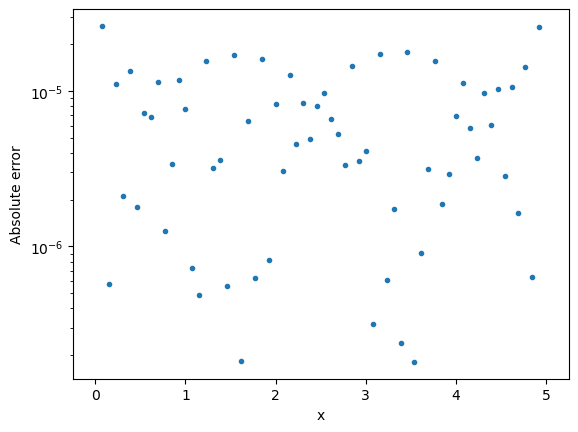

In [7]:
plt.plot(test_points, np.abs(test_values - cspl(test_points)), '.')
# plt.legend()
plt.xlabel('x')
plt.yscale('log')
plt.ylabel('Absolute error')
plt.show()

Cubic splines are not fully constrained by the sample data, but require a choice of boundary conditions. We can check the different types of boundary conditions offered by `multispline` by calling `available_boundary_conditions()`

In [8]:
from multispline.spline import available_boundary_conditions
available_boundary_conditions()

['natural', 'not-a-knot', 'clamped', 'E(3)']

The default choice is known as the "E(3)" boundary condition. Other boundary conditions may be specified using the optional `bc` argument when instantiating `CubicSpline`

In [9]:
cspl_natural = CubicSpline(sample_points, sample_values, bc='natural')

Notice that this new spline will not exactly agree with the original spline

In [10]:
print(cspl_natural(0.001) - cspl(0.001))

-0.00014990567110854947


Different boundary conditions may be better at approximating the behavior of the test function near the boundary. However, which boundary condition works best depends on the problem and the number of sample points. Below, we demonstrate how the "E(3)" boundary condition most accurately approximates the test function near the boundary, though the "not-a-knot" algorithm provides similarly well and more accurately approximates the test function at some points near the boundary.

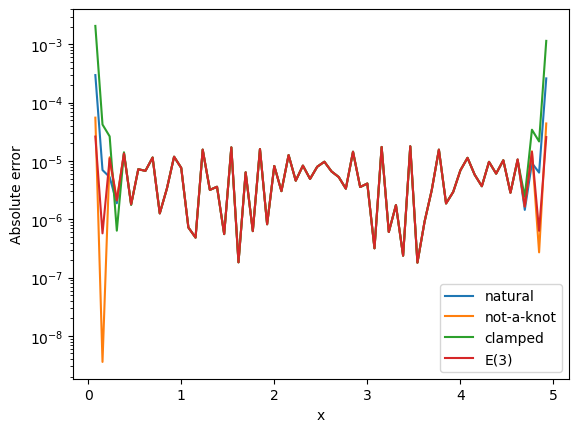

In [11]:
cspl_bcs = {}
for bc in available_boundary_conditions():
    cspl_bcs[bc] = CubicSpline(sample_points, sample_values, bc=bc)

for bc in available_boundary_conditions():
    plt.plot(test_points[1:-1], np.abs(cspl_bcs[bc](test_points[1:-1]) - test_function(test_points[1:-1])), label=bc)
plt.legend()
plt.yscale('log')
plt.xlabel('x')
plt.ylabel('Absolute error')
plt.show()

We can also evaluate the first and second derivatives of the spline through the methods `deriv` and `deriv2`

In [12]:
print(cspl.deriv(0.4325))
print(cspl.deriv2(0.4325))

1.8338073517167228
3.3129057480026125


And we can directly access the spline coefficients through the class property `coefficients`---which returns a full array of coefficients---or the method `coeff` which returns a single coefficient for a given interval and polynomial power. (See documentation for more information.)

In [13]:
print(cspl.coefficients[:10, :10])
print(cspl.coefficients[43, 3])
print(cspl.coeff(43, 3))

[[ 1.00000000e-01  5.08213538e-02 -1.35749987e-02  7.52230981e-04]
 [ 1.37998586e-01  2.59280493e-02 -1.13183057e-02  1.40760863e-03]
 [ 1.54015938e-01  7.51426371e-03 -7.09547987e-03  2.06298627e-03]
 [ 1.56497708e-01 -4.87737213e-04 -9.06521058e-04  2.10237484e-03]
 [ 1.57205825e-01  4.00634520e-03  5.40060347e-03  1.63719121e-03]
 [ 1.68249965e-01  1.97191258e-02  1.03121771e-02  7.51166869e-04]
 [ 1.99032435e-01  4.25969806e-02  1.25656777e-02 -3.25688390e-04]
 [ 2.53869404e-01  6.67512708e-02  1.15886125e-02 -1.32673577e-03]
 [ 3.30882552e-01  8.59482885e-02  7.60840521e-03 -2.00129622e-03]
 [ 4.22437949e-01  9.51612103e-02  1.60451654e-03 -2.18099410e-03]]
5.912839775437061e-05
5.912839775437061e-05


More information can be found in the code documentation, which can be accessed, for example, via

`?CubicSpline`

`?CubicSpline.coeff`

## Bicubic Spline (2D)

The class `BicubicSpline` provides a method for interpolating data sampled on a uniform two-dimensional grid.

In [14]:
from multispline.spline import BicubicSpline
import numpy as np
import matplotlib.pyplot as plt

As an example, we demonstrate how we can use this class to interpolate a two-dimensional test function

In [15]:
def test_function_2d(x, y):
    return np.sin(x) * np.cos(4*y)

NX = 100
NY = 101
sample_points_x = np.linspace(0, 5, NX)
sample_points_y = np.linspace(0, 5, NY)
sample_grid_xy = np.meshgrid(sample_points_x, sample_points_y, indexing='ij')
sample_values_z = test_function_2d(*sample_grid_xy)

Once again, interpolating the data is as simple as instantiating `BicubicSpline`. Note that the grid points are passed in as 1D-arrays, while the sample values must be passed on a 2D grid with dimensions (NX, NY)

In [16]:
bspl = BicubicSpline(sample_points_x, sample_points_y, sample_values_z)

We can visually inspect the performance of our interpolating function in one dimension by fixing the value of $x$ or $y$

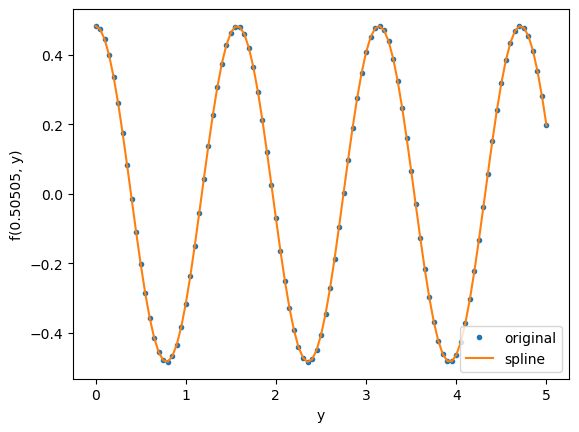

In [17]:
plt.plot(sample_points_y, sample_values_z[10], '.', label='original')
plt.plot(sample_points_y, bspl(sample_points_x[10], sample_points_y), label='spline')
plt.legend()
plt.xlabel('y')
plt.ylabel(f'f({str(sample_points_x[10])[:7]}, y)')
plt.show()

Alternatively, we can compare the spline against the test function on a grid that differs from the sample grid

In [18]:
test_points_x = np.linspace(0, 5, 66)
test_points_y = np.linspace(0, 5, 66)
test_grid_xy = np.meshgrid(test_points_x, test_points_y, indexing='ij')
test_values_z = test_function_2d(*test_grid_xy)
bspl_values_z = bspl(*test_grid_xy)

Plotting the absolute error in two-dimensions, we see good agreement between the spline and the exact solution

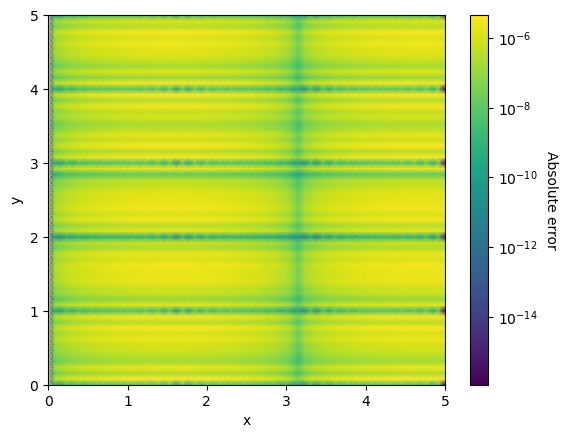

In [19]:
from matplotlib.colors import LogNorm
plt.pcolormesh(*test_grid_xy, np.abs(bspl_values_z - test_values_z), shading='gouraud', norm=LogNorm())
cbar = plt.colorbar()
cbar.set_label('Absolute error', rotation=270, labelpad=15)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Like `CubicSpline`, a `BicubicSpline` can be created using different boundary conditions. At the moment, the code requires that the same boundary condition is used for all dimensions.

One can also evaluate up to two partial derivatives of the spline via the class methods `deriv_x`, `deriv_y`, `deriv_xx`, `deriv_yy`, and `deriv_xy`.

Lastly, one can access spline coefficients through the class property `coefficients` or method `coeff`

## Tricubic Spline (3D)

The class `TricubicSpline` provides a method for interpolating data sampled on a uniform three-dimensional grid.

In [20]:
from multispline.spline import TricubicSpline

As before, we demonstrate its use by interpolating a three-dimensional test function

In [21]:
def test_function_3d(x, y, z):
    return np.sin(x) * np.cos(4*y) + np.i0(3.2*z)

NX = 65
NY = 100
NZ = 85
sample_points_x = np.linspace(0, 5, NX)
sample_points_y = np.linspace(0, 5, NY)
sample_points_z = np.linspace(-2, 2, NZ)
sample_points_grid = np.meshgrid(sample_points_x, sample_points_y, sample_points_z, indexing='ij')
sample_values_f = test_function_3d(*sample_points_grid)

Like the other spline classes, the spline is created by instantiating `TricubicSpline`. The grid points are passed in as 1D-arrays, while the sample values must be passed on a 3D grid with dimensions (NX, NY, NZ)

In [22]:
tspl = TricubicSpline(sample_points_x, sample_points_y, sample_points_z, sample_values_f)

We can compare the spline against the test function on a grid that differs from the sample grid

In [23]:
test_points_x = np.linspace(0, 5, 77)
test_points_y = np.linspace(0, 5, 81)
test_points_z = np.linspace(-2, 2, 59)
test_points_grid = np.meshgrid(test_points_x, test_points_y, test_points_z, indexing='ij')
test_values_f = test_function_3d(*test_points_grid)
tspl_values_f = tspl(*test_points_grid)

To make it easier to visualize the comparison, we take the maximum error along the x-axis to reduce the data down to two dimensions.

In [24]:
average_error = np.max(np.abs(tspl_values_f - test_values_f), axis=0)
plot_grid = np.meshgrid(test_points_y, test_points_z, indexing='ij')

Making it easy to plot the results

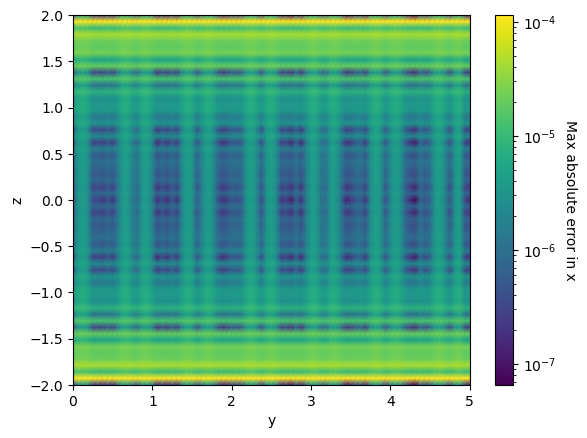

In [ ]:
from matplotlib.colors import LogNorm
plt.pcolormesh(*plot_grid, average_error, shading='gouraud', norm=LogNorm())
cbar = plt.colorbar()
cbar.set_label('Max absolute error in x', rotation=270, labelpad=15)
plt.xlabel('y')
plt.ylabel('z')
plt.show()

Like the other classes, a `TricubicSpline` can be created using different boundary conditions. At the moment, the code requires that the same boundary condition is used for all dimensions.

One can also evaluate up to two partial derivatives of the spline via the class methods `deriv_x`, `deriv_y` , `deriv_z`, `deriv_xx`, `deriv_yy`, `deriv_zz`, `deriv_xy`, `deriv_yz`, and `deriv_xz`.

Lastly, one can access spline coefficients through the class property `coefficients` or method `coeff`